# Different Approaches to Defining Neural Networks with Keras and TensorFlow

[TensorFlow](https://www.tensorflow.org/) 2.0 came with many new exciting updates. One of these updates was full integration with the very popular [Keras API](https://keras.io/) for developing deep learning models. Before TensorFlow 2.0, you had two install TensorfFlow and Keras separately. Now, Keras comes as a submodule of TensorFlow (*i.e.*, tensorflow.keras). We will be using Keras and TensorFlow on the majority of tutorials in this class. There are 3 ways to define Neural Networks with Keras. In this tutorial we will cover these different ways.

The learning goals of this tutorial are:
    - Introduce the Keras sequential API, functional API and model subclassing methods for defining neural networks;
    - Illustrate a simple classiifcation problem using the Iris dataset.


# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*


In [126]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  # Function for loading the Iris dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [128]:
# Load the dataset and return to the defined variable 
dataset = load_iris()

In [129]:
# Load iris data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [130]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [131]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train, Validation and Test Sets Split

In [133]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

In [135]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# 1. Change the min-max normalization above by standardization ((X - mean)/(std))
# 2. Don't normalize the data and see what happens
####################################################################################

## Representing Labels using one-hot-ecoding

In [137]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[0 1 1 1 2]

Y_oh_train[:5]=
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [138]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (75, 4)
Size of X_val :  (37, 4)
Size of X_test :  (38, 4)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [140]:
from tensorflow.keras.models import Sequential 
# Passing a list of layers to the constructor
model = Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,) , name = "layer1"),
    tf.keras.layers.Dense(10, activation='relu' , name = "layer2"),
    tf.keras.layers.Dense(3, activation='softmax', name = "layer3"),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 25        
                                                                 
 layer2 (Dense)              (None, 10)                60        
                                                                 
 layer3 (Dense)              (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


### 2. The Functional API

In [142]:
from tensorflow.keras.models import Model
# This returns a tensor
input_tensor = tf.keras.layers.Input(shape=(4,))
# A layer instance is callable on a tensor, and returns a tensor
x1 = tf.keras.layers.Dense(5, activation='relu')(input_tensor)
x2 = tf.keras.layers.Dense(10, activation='relu')(x1)
out_tensor = tf.keras.layers.Dense(3, activation='softmax')(x2)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=out_tensor)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_24 (Dense)            (None, 5)                 25        
                                                                 
 dense_25 (Dense)            (None, 10)                60        
                                                                 
 dense_26 (Dense)            (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## 3. Model Subclassing 

In [144]:
class MyNeuralNetwork(Model):
    def __init__(self, **kwargs):
        super(MyNeuralNetwork, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        out_tensor = self.dense3(x2)
        return out_tensor
model = MyNeuralNetwork()
model.build(input_shape = (None,4))
model.summary()

Model: "my_neural_network_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            multiple                  25        
                                                                 
 dense_28 (Dense)            multiple                  60        
                                                                 
 dense_29 (Dense)            multiple                  33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

In [147]:
import tensorflow as tf
from tensorflow.keras import backend as K

class CategoricalFocalCrossentropy(tf.keras.losses.Loss):
    def __init__(self, gamma=2., alpha=0.25, name='categorical_focal_loss'):
        super(CategoricalFocalCrossentropy, self).__init__(name=name)
        self.gamma = gamma
        self.alpha = alpha

    def call(self, y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

        # Clip predictions to prevent log(0) errors
        epsilon = K.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        # Compute cross-entropy loss
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = self.alpha * tf.pow(1 - y_pred, self.gamma) * cross_entropy

        return tf.reduce_mean(tf.reduce_sum(loss, axis=-1))

# Now you can use this focal loss in your model compilation
focal_loss = CategoricalFocalCrossentropy(gamma=2.0, alpha=0.25)
model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])


In [149]:
focal_loss = CategoricalFocalCrossentropy(gamma=2.0, alpha=0.25)
model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])

In [153]:
# training the model 
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
2/2 [==============================] - 0s 40ms/step - loss: 0.1234 - accuracy: 0.0800 - val_loss: 0.1219 - val_accuracy: 0.2703
Epoch 2/300
2/2 [==============================] - 0s 13ms/step - loss: 0.1229 - accuracy: 0.0800 - val_loss: 0.1214 - val_accuracy: 0.2973
Epoch 3/300
2/2 [==============================] - 0s 13ms/step - loss: 0.1225 - accuracy: 0.1333 - val_loss: 0.1210 - val_accuracy: 0.2973
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 0.1220 - accuracy: 0.1467 - val_loss: 0.1207 - val_accuracy: 0.3243
Epoch 5/300
2/2 [==============================] - 0s 12ms/step - loss: 0.1216 - accuracy: 0.1600 - val_loss: 0.1203 - val_accuracy: 0.3784
Epoch 6/300
2/2 [==============================] - 0s 11ms/step - loss: 0.1212 - accuracy: 0.1867 - val_loss: 0.1199 - val_accuracy: 0.4324
Epoch 7/300
2/2 [==============================] - 0s 15ms/step - loss: 0.1208 - accuracy: 0.2533 - val_loss: 0.1196 - val_accuracy: 0.4595
Epoch 8/300
2/2 [===

Test loss (cross-entropy and accuracy): [0.011797470971941948, 1.0]

Layer 0
Bias:
 [ 0.12740299  0.42333776  0.11923473 -0.10123789  0.2783648 ]
W:
 [[ 0.09350391 -0.21840955  0.68061435  0.65545094  0.5229804 ]
 [-0.2160197   0.8305202  -0.37784135 -0.66551965 -0.36244312]
 [ 0.6932682  -0.5266959   0.50132596  0.43544438  0.29135442]
 [-0.52846944 -0.31964517  1.3248746  -0.8044976  -0.63452345]]

Layer 1
Bias:
 [ 0.          0.2366168  -0.08091437  0.34269184  0.27986872 -0.17337504
  0.28683954  0.25470483  0.32463017  0.        ]
W:
 [[-0.13385946 -0.11069494 -0.02005268 -0.17915353  0.26535276 -0.5569077
  -0.53586584  0.2276879  -0.23899058 -0.06596029]
 [-0.45857364  0.83592093  0.09869956  0.5861024  -0.37491184 -0.8543281
   0.47696507 -0.25185862  0.83839315 -0.25253487]
 [-0.41754586 -0.4664949  -0.63412744 -0.17169206  0.65887594  0.5665944
  -0.17265187  0.77744526 -0.61496216 -0.5537902 ]
 [ 0.30975515 -0.42699176  0.20314854  0.14648117 -0.49760863  0.0565956
  -0.0522

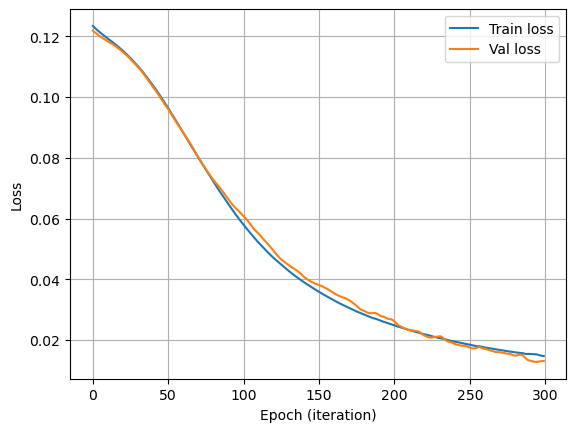

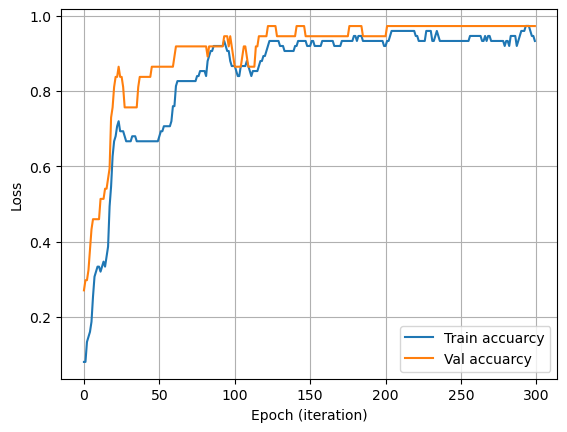

In [154]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3